# Final Project

## How to Run the Code

This notebook demonstrates the how to run the code part in this final project. 
`test_final.py` covers all the functionality of the following features from the `final.py` module. So, we are going to run pytest here.

1. **Fahrenheit to Kelvin Converter**: Converts a temperature from Fahrenheit to Kelvin.
2. **Markdown Temperature Parser**: Extracts the temperature (in Fahrenheit) from a Markdown file.
3. **Filename Lister**: Lists all Markdown files in a directory matching a specific pattern.
4. **Non-linear Fitting**: Performs non-linear curve fitting.
5. **Numpy FFT Wrapper**: Performs FFT and inverse FFT with support for non-equidistant data checks.
6. **Pure Python Frequency Axis Calculator**: Computes the frequency axis without using NumPy.

### To run the code locally:
#### System requirements 
- pc (windows/mac/linux)
- Python3 
- pip 

#### Steps
1. Clone the repository locally using a terminal (with git features)
```bash
    git clone https://github.com/dhamalakamal/CP1-24-final.git
    cd CP1-24-final
```

2. Create virtual environment and activate:
```bash
    python3 -m venv venv # create a virtual environment
    source venv/Scripts/activate # to enable virtual environment | for windows do without `source` command
```

3. Install required libraries:
```bash
    pip install -r requirements.txt # install all the required libraries for the code to work
```

4. Run the test which covers all above mentioned functionality in `final.py`: 
```bash
    pytest dhamalakamal/code/test_final.py 

    # to run a specific test for specific method 
    pytest dhamalakamal/code/test_final.py::[name_of_the_test] # look into the test_final.py file for the name of the test
    pytest dhamalakamal/code/test_final.py::test_fahrenheit_to_kelvin
```

### To run on online workspace

#### Requirements 
- You must have a github account and login with your account.
- Have access to the repo `dhamalakamal/CP1-24-final` to be able to fork it.

#### Steps
- Fork it from fork option available there on the repo page
- Then from your forked repo, go to `Code` option.
- Click on `Codespaces` tab from dropdown.
- Click `+` sign to create a new codespace on main.
- It will take few minutes to create one for you, wait until then.
- Once the codespace is ready, click on it (it will be with some random name under `On current branch` within the codespace tab).
- It will open the codespace with everything ready to run.
- There will be a terminal space open down the readme section.
- Run the test which covers all the function inside `final.py`. 
```bash
    pytest dhamalakamal/code/test_final.py 

    # to run a specific test for specific method 
    pytest dhamalakamal/code/test_final.py::[name_of_the_test] # look into the test_final.py file for the name of the test
    pytest dhamalakamal/code/test_final.py::test_fahrenheit_to_kelvin
```

## Bibliography

1. **ChatGPT**  
   Assistance with understanding concepts and implementing code.  

2. **Merge two Git repositories without breaking file history**  
   Stack Overflow discussion on merging Git repositories. [Merge](https://stackoverflow.com/questions/13040958/merge-two-git-repositories-without-breaking-file-history)

3. **Python Documentation: `os` module**  
   Reference for using the `os` library in Python. [os module](https://docs.python.org/3/library/os.html)

4. **NumPy Documentation: FFT functions**  
   Detailed documentation on FFT and inverse FFT functions in NumPy. [FFT functions](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)

5. **Markdown Parsing**  
   Insights and techniques from ChatGPT and adapted from Markdown specifications and online tutorials. [ChatGPT](https://chatgpt.com/c/674cffd8-8c34-8001-9456-69b58624a61d)

6. **Non-linear Fitting: `curve_fit`**  
   Documentation for `curve_fit` function in Scipy for non-linear fitting. [Scipy curve_fit documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)


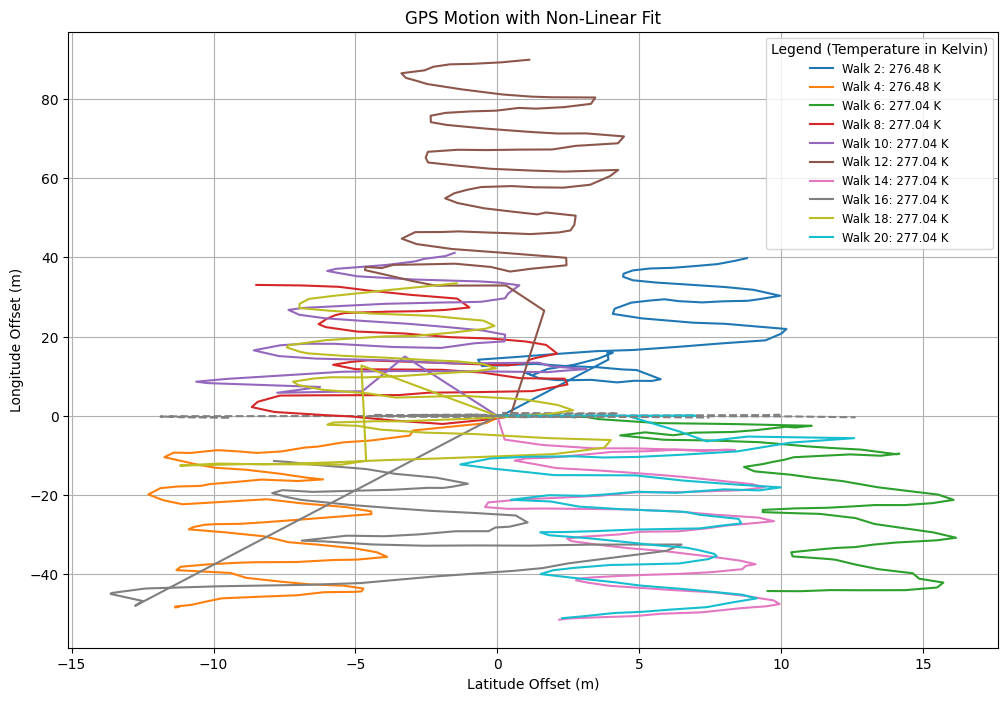

In [38]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
# Update paths to reflect new folder structure
sys.path.append(str(Path("../code")))  # Add code directory to the Python path
from final import fahrenheit_to_kelvin, parse_temperature_from_md, nonlinear_fit

# Define the data directory
project_root = Path("../")
data_dir = project_root / "data"

# Initialize the plot
plt.figure(figsize=(12, 8))

# Iterate through all 20 repetitions
for i in range(2, 21, 2):
    # Construct file names
    unique_id = f"gps{i:02d}"
    csv_file = data_dir / f"{unique_id}_sinewalk.csv"
    md_file = data_dir / f"{unique_id}_sinewalk.md"

    # Read CSV file for GPS motion
    df = pd.read_csv(csv_file)
    latitudes = df["Latitude (°)"].values
    longitudes = df["Longitude (°)"].values

    # Convert latitude and longitude to meters (approximating 1 degree ≈ 111,000 meters)
    latitudes_m = (latitudes - latitudes[0]) * 111000
    longitudes_m = (longitudes - longitudes[0]) * 111000 * np.cos(np.radians(latitudes[0]))

    # Read temperature from the Markdown file
    temp_fahrenheit = parse_temperature_from_md(str(md_file))
    temp_kelvin = fahrenheit_to_kelvin(temp_fahrenheit)

    # Apply non-linear fitting to the GPS motion
    def model_function(x: float) -> float:
        return np.sin(0.01 * x)  # Example model function (can adjust as needed)

    step = 16  # Choose step size (must be a power of 2)
    # Apply the nonlinear fit with smoothing
    smoothed_data = nonlinear_fit(longitudes_m.tolist(), step, model_function, smooth=True, window_size=4)


    # Plot the GPS motion and the non-linear fit
    plt.plot(latitudes_m, longitudes_m, label=f"Walk {i}: {temp_kelvin:.2f} K")
    plt.plot(latitudes_m[::step], smoothed_data, linestyle="--", color="gray")

# Configure the plot
plt.title("GPS Motion with Non-Linear Fit")
plt.xlabel("Latitude Offset (m)")
plt.ylabel("Longitude Offset (m)")
plt.legend(title="Legend (Temperature in Kelvin)", loc="best", fontsize="small")
plt.grid(True)

# Save the plot as an image file in the documentation folder
output_dir = project_root / "documentation"
output_dir.mkdir(exist_ok=True)
output_file = output_dir / "gps_walks_of_nonlinear_fit_plot.png"
plt.savefig(output_file)

# Show the plot
plt.show()


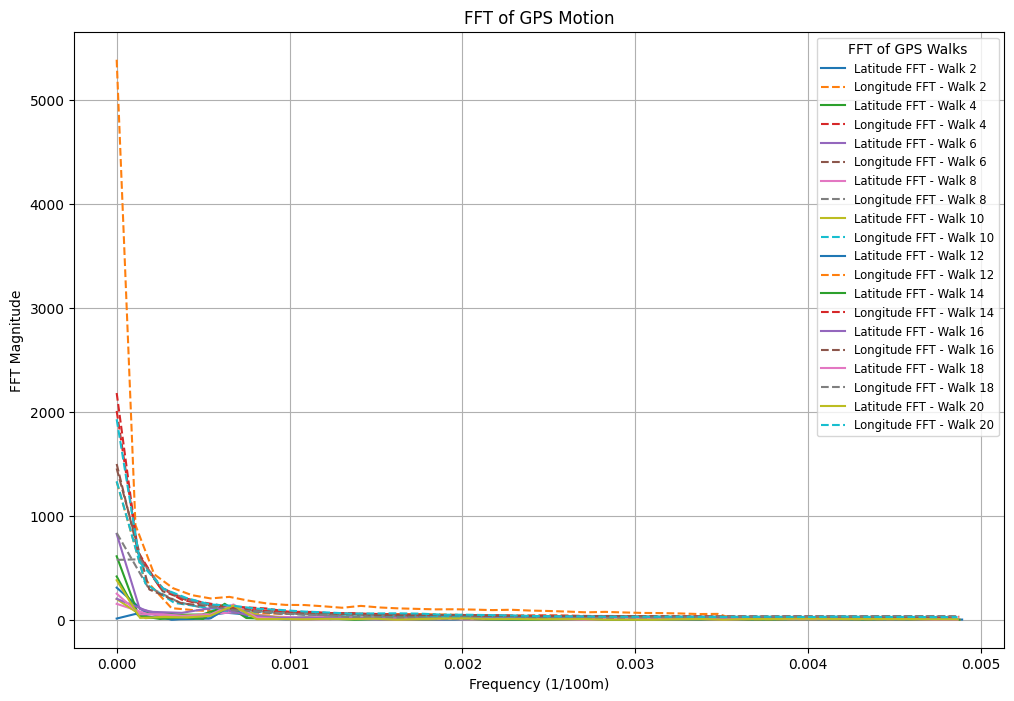

In [ ]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
# Update paths to reflect new folder structure
sys.path.append(str(Path("../code")))  # Add code directory to the Python path
from final import fft_wrapper # type: ignore

def filter_fft(freq_data, threshold=0.1):
    """
    Filters the FFT data to remove high-frequency components.

    Parameters:
        freq_data (np.ndarray): FFT-transformed data.
        threshold (float): Threshold for filtering magnitude.

    Returns:
        np.ndarray: Filtered FFT data.
    """
    freq_magnitude = np.abs(freq_data)
    freq_data[freq_magnitude < threshold * np.max(freq_magnitude)] = 0
    return freq_data

# Define the data directory
project_root = Path("../")
data_dir = project_root / "data"

# Initialize the plot
plt.figure(figsize=(12, 8))

# Iterate through all 20 repetitions
for i in range(2, 21, 2):
    # Construct file names
    unique_id = f"gps{i:02d}"
    csv_file = data_dir / f"{unique_id}_sinewalk.csv"

    # Read CSV file for GPS motion
    df = pd.read_csv(csv_file)
    latitudes = df["Latitude (°)"].values
    longitudes = df["Longitude (°)"].values

    # Convert latitude and longitude to meters (approximating 1 degree ≈ 111,000 meters)
    latitudes_m = (latitudes - latitudes[0]) * 111000
    longitudes_m = (longitudes - longitudes[0]) * 111000 * np.cos(np.radians(latitudes[0]))

    # # Check if data is equidistant
    # if not check_equidistant(latitudes_m):
    #     print(f"Run {i}: Latitude data is not equidistant. Skipping.")
    #     continue
    # if not check_equidistant(longitudes_m):
    #     print(f"Run {i}: Longitude data is not equidistant. Skipping.")
    #     continue
    
    # Apply FFT to the latitude and longitude data using the fft_wrapper
    fft_latitudes = fft_wrapper(latitudes_m)
    fft_longitudes = fft_wrapper(longitudes_m)

    # Compute frequency axis (1/100m)
    num_points = len(longitudes_m)
    freq_axis = np.fft.fftfreq(num_points, d=100)  # 1 unit = 100m, Scaling by 100m for the frequency axis
    freq_axis = freq_axis[:num_points // 2]  # Positive frequencies only

    # Calculate magnitudes of raw FFT | if uncommented, we should comment out filtered fft below
    # fft_mag_latitudes = np.abs(fft_latitudes)[:num_points // 2]
    # fft_mag_longitudes = np.abs(fft_longitudes)[:num_points // 2]

    # Magnitude of the filtered FFT
    threshold = 0.01
    filtered_fft_lat_data = filter_fft(fft_latitudes, threshold)
    filtered_fft_long_data = filter_fft(fft_longitudes, threshold)
    fft_mag_latitudes = np.abs(filtered_fft_lat_data)[:num_points // 2]
    fft_mag_longitudes = np.abs(filtered_fft_long_data)[:num_points // 2]

    # Plot the FFT for latitudes and longitudes against frequency axis
    plt.plot(freq_axis, fft_mag_latitudes, label=f"Latitude FFT - Walk {i}")
    plt.plot(freq_axis, fft_mag_longitudes, label=f"Longitude FFT - Walk {i}", linestyle="--")

# Configure the plot
plt.title("FFT of GPS Motion")
plt.xlabel("Frequency (1/100m)")
plt.ylabel("FFT Magnitude")
plt.legend(title="FFT of GPS Walks", loc="best", fontsize="small")
plt.grid(True)

# Save the plot as an image file in the documentation folder
output_dir = project_root / "documentation"
output_dir.mkdir(exist_ok=True)
output_file = output_dir / "fft_of_gps_walks_plot.png"
plt.savefig(output_file)

# Show the plot
plt.show()

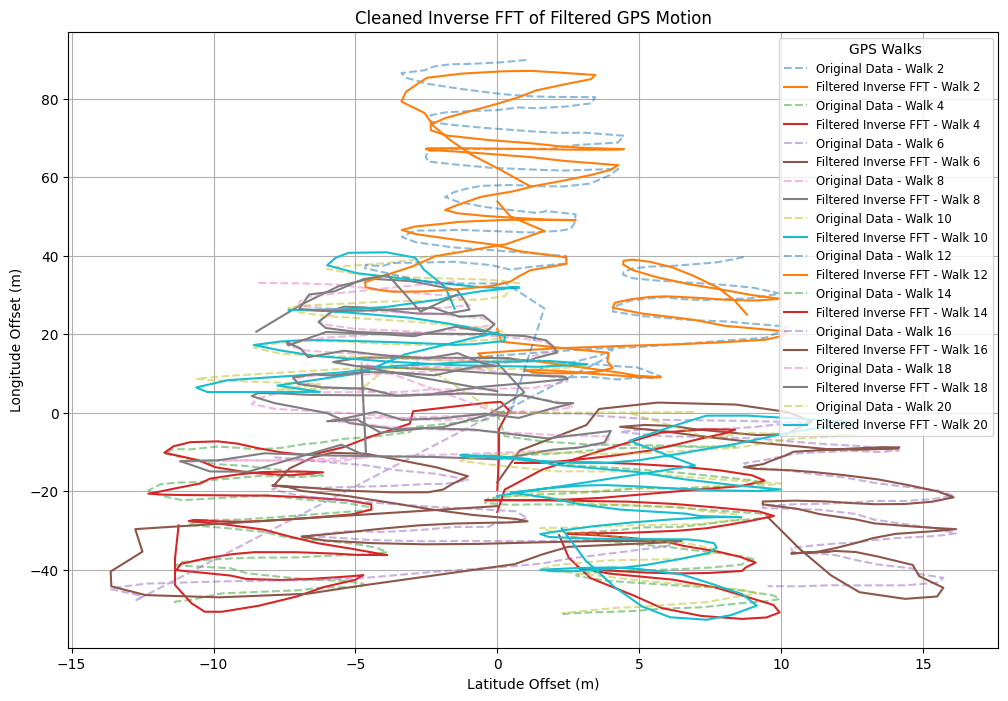

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
from pathlib import Path

# Update paths to reflect new folder structure
sys.path.append(str(Path("../code")))  # Add code directory to the Python path

from final import fft_wrapper, inverse_fft_wrapper # type: ignore

def filter_fft(freq_data, threshold=0.1):
    """
    Filters the FFT data to remove high-frequency components.

    Parameters:
        freq_data (np.ndarray): FFT-transformed data.
        threshold (float): Threshold for filtering magnitude.

    Returns:
        np.ndarray: Filtered FFT data.
    """
    freq_magnitude = np.abs(freq_data)
    freq_data[freq_magnitude < threshold * np.max(freq_magnitude)] = 0
    return freq_data

# Define the data directory
project_root = Path("../")
data_dir = project_root / "data"

# Initialize the plot
plt.figure(figsize=(12, 8))

# Iterate through all 20 repetitions
for i in range(2, 21, 2):
    # Construct file names
    unique_id = f"gps{i:02d}"
    csv_file = data_dir / f"{unique_id}_sinewalk.csv"

    # Read CSV file for GPS motion
    df = pd.read_csv(csv_file)
    latitudes = df["Latitude (°)"].values
    longitudes = df["Longitude (°)"].values

    # Convert latitude and longitude to meters (approximating 1 degree ≈ 111,000 meters)
    latitudes_m = (latitudes - latitudes[0]) * 111000
    longitudes_m = (longitudes - longitudes[0]) * 111000 * np.cos(np.radians(latitudes[0]))

    # Apply FFT to the latitude and longitude data using the fft_wrapper
    fft_latitudes = fft_wrapper(latitudes_m)
    fft_longitudes = fft_wrapper(longitudes_m)

    # Apply FFT and filter
    fft_data = fft_wrapper(longitudes_m)
    filtered_fft_data = filter_fft(fft_data, threshold=0.05)
    inverse_filtered_data = inverse_fft_wrapper(filtered_fft_data).real  # Use only real part

    # Plot Original and Filtered Inverse FFT
    plt.plot(latitudes_m, longitudes_m, label=f"Original Data - Walk {i}", linestyle="--", alpha=0.5)
    plt.plot(latitudes_m, inverse_filtered_data, label=f"Filtered Inverse FFT - Walk {i}")

# Plot Configurations
plt.title("Cleaned Inverse FFT of Filtered GPS Motion")
plt.xlabel("Latitude Offset (m)")
plt.ylabel("Longitude Offset (m)")
plt.legend(title="GPS Walks", fontsize="small", loc="best")
plt.grid(True)

# Save the plot as an image file in the documentation folder
output_dir = project_root / "documentation"
output_dir.mkdir(exist_ok=True)
output_file = output_dir / "filtered_inverse_fft_plot.png"
plt.savefig(output_file)

# Display the plot
plt.show()
